# Homework 1

#### Package/data Imports

In [87]:
#Import packages
import numpy as np 
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [88]:
#Import data
url = 'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/bank_data.csv'
data = pd.read_csv(url)

#Numeric df
num_cols = data.select_dtypes(include = np.number)
#Non-numeric df
non_num_cols = data.select_dtypes(exclude = np.number)
non_num_cols.drop(columns = 'id', inplace = True)

___
## Problem 1: 
Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

#### Numeric Summary Stats

##### Age

In [7]:
#DF of notable stats
age_stats_df = pd.DataFrame({'Mode': [num_cols.age.mode()[0]], 'Mean': [round(num_cols.age.mean(), 2)], 'Stdev': [round(num_cols.age.std(), 2)], 'Median': [num_cols.age.median()], 'Min': [num_cols.age.min()], 'Max': [num_cols.age.max()]})
age_stats_df

,Mode,Mean,Stdev,Median,Min,Max
0,40,42.4,14.42,42.0,18,67


##### Income

In [9]:
#DF of notable stats
income_stats_df = pd.DataFrame({'Mode': [num_cols.income.mode()[0]], 'Mean': [round(num_cols.income.mean(), 2)], 'Stdev': [round(num_cols.income.std(), 2)], 'Median': [num_cols.income.median()], 'Min': [num_cols.income.min()], 'Max': [num_cols.income.max()]})
income_stats_df

,Mode,Mean,Stdev,Median,Min,Max
0,38248.3,27524.03,12899.47,24925.3,5014.21,63130.1


##### Children

In [11]:
#DF of notable stats
income_stats_df = pd.DataFrame({'Mode': [num_cols.children.mode()[0]], 'Mean': [round(num_cols.children.mean(), 2)], 'Stdev': [round(num_cols.children.std(), 2)], 'Median': [num_cols.children.median()], 'Min': [num_cols.children.min()], 'Max': [num_cols.children.max()]})
income_stats_df

,Mode,Mean,Stdev,Median,Min,Max
0,0,1.01,1.06,1.0,0,3


#### Categorical Histograms

In [1]:
#For each column (except id), plot histogram
for item, col in enumerate(non_num_cols.columns): 
    non_num_cols[col].value_counts().plot(kind = 'bar')
    plt.title('%s' %(col))
    plt.show()

NameError: name 'data' is not defined

___

## Problem 2: 
Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations 

In [89]:
#Create dataframes for pep and non-pep
pep_df = data.loc[data.pep == 'YES']
#Drop id
pep_df.drop('id', axis = 1, inplace = True)
#Numeric dataframe
pep_num = pep_df.select_dtypes(include = np.number)

no_pep_df = data.loc[data.pep == 'NO']
#Drop id
no_pep_df.drop('id', axis = 1, inplace = True)
#Numeric dataframe
no_pep_num = no_pep_df.select_dtypes(include = np.number)

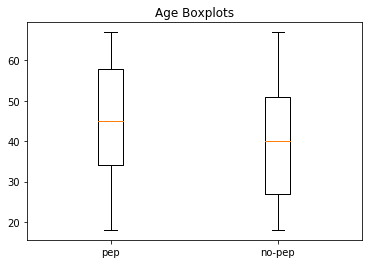

In [31]:
#Age Box Plot
plot_ = plt.boxplot([pep_num.age, no_pep_df.age], labels = ['pep', 'no-pep'])
title_ = plt.title('Age Boxplots')

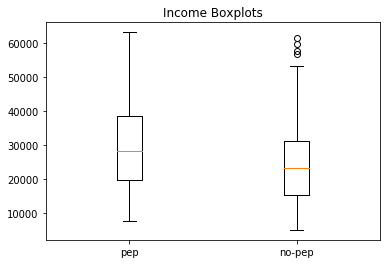

In [32]:
#Income Box Plot
plot_ = plt.boxplot([pep_num.income, no_pep_df.income], labels = ['pep', 'no-pep'])
title_ = plt.title('Income Boxplots')

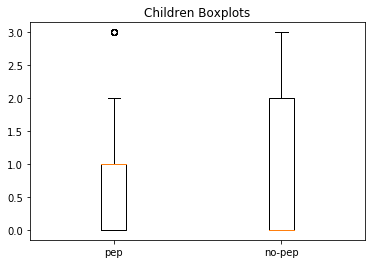

In [33]:
#Children Box Plot
plot_ = plt.boxplot([pep_num.children, no_pep_df.children], labels = ['pep', 'no-pep'])
title_ = plt.title('Children Boxplots')

In [41]:
#Mode dataframe
mode_df = pd.DataFrame({'pep-mode': [pep_df['%s' %(col)].mode()[0] for col in pep_df.columns], 'non-pep-mode': [no_pep_df['%s' %(col)].mode()[0] for col in no_pep_df.columns]}).set_index(pep_df.columns)
mode_df

,pep-mode,non-pep-mode
age,64,27
income,7756.36,38248.3
children,1,0
gender,MALE,FEMALE
region,INNER_CITY,INNER_CITY
married,YES,YES
car,YES,NO
savings_acct,YES,YES
current_acct,YES,YES
mortgage,NO,NO


##### Findings: 
The first thing I noticed was that there wasn't too much of an age gap between those with pep and those without. Both have regions with INNER_CITY as the mode and both pep and non-pep are more commonly married. Some of the differences I saw were in the most common number of children; 1 for pep and 0 for non-pep. Another difference is that non-pep people more commonly don't have cars while people with pep do. People with pep also have a higher salary range than non-pep people.

____

# Problem 3: 
Use z-score normalization to standardize the values of the income attribute. Do not change the original
income attribute in the table.

In [44]:
#Create z_income column and apply stats.zscore
data['z_income'] = stats.zscore(data.income)
data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,z_income
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.774168
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198706
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.849474
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554643
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.788562


___

# Problem 4: 
Use z-score normalization to standardize the values of the income attribute. [Do not change the original
income attribute in the table.]


In [48]:
#Create age_bin column and create age bins
data['age_bin'] = pd.cut(data.age, [20, 35, 51, 70], labels = ['younger', 'middle-aged', 'older'])
data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,z_income,age_bin
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.774168,middle-aged
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198706,middle-aged
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.849474,middle-aged
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554643,younger
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.788562,older


___

# Problem 5: 
Use Min-Max Normalization to transform the values of all numeric attributes (income, age, children) in
the original table (before the transforamtions in parts 3 and 4 above) onto the range 0.0-1.0.

In [67]:
#Create numpy array for age, income, and children
np_vals = num_cols.values

#Create min max scalar
min_max = preprocessing.MinMaxScaler()

#Fit scalar to numpy array
norm_np_vals = min_max.fit_transform(np_vals)

#Create dataframe of normalized values
norm_df = pd.DataFrame(norm_np_vals, columns = num_cols.columns)

#Replace age, income, and children in original dataframe
data.age = norm_df.age
data.income = norm_df.income
data.children = norm_df.children
data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


___

# Problem 6: 
Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this
requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values
of the categorical attribute) and assigning binary values corresponding to the presence or not presence of
the attribute value in the original record). The numeric attributes should remain unchanged. Save this new
table into a file called bank_numeric.csv and submit it along with your assignment. Hint: you might
consider using the get_dummies for Pandas data frames.

In [72]:
#Path to save file
path = r'C:\Users\Luxo_Jr\Desktop\School\winter-2019\dsc478-programming-ml-applications\data'

#Create transform dataframe and apply get_dummies to all non_numeric columns
data_trans = pd.get_dummies(data, columns = non_num_cols.columns)
data_trans.head()

#Write to csv
data_trans.to_csv(os.path.join(path, 'bank_numeric.csv'), index = False)

___

# Problem 7: 
Using the standardized data set (of the previous part), perform basic correlation analysis among the
attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of
attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID
column before creating the correlation matrix. Hint:you can create the correlation matrix by using
the corr() function in Pandas or corrcoef function in NumPy.

In [78]:
#Drop id column
data_trans_ = data_trans.drop('id', axis = 1)

#Correlation matirx
data_trans_.corr().style.background_gradient().set_precision(2)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1,0.75,0.024,0.09,-0.09,-0.025,0.019,0.031,-0.0085,-0.01,0.01,-0.078,0.078,-0.18,0.18,0.035,-0.035,0.016,-0.016,-0.17,0.17
income,0.75,1,0.037,0.024,-0.024,-0.048,0.085,0.03,-0.036,0.0084,-0.0084,-0.082,0.082,-0.27,0.27,-0.032,0.032,0.015,-0.015,-0.22,0.22
children,0.024,0.037,1,0.014,-0.014,-0.051,0.09,-0.014,-0.007,0.049,-0.049,-0.036,0.036,-0.042,0.042,-0.0062,0.0062,0.074,-0.074,0.058,-0.058
gender_FEMALE,0.09,0.024,0.014,1,-1,-0.023,-0.0091,-0.011,0.04,0.021,-0.021,0.0067,-0.0067,0.0072,-0.0072,-0.019,0.019,0.066,-0.066,0.047,-0.047
gender_MALE,-0.09,-0.024,-0.014,-1,1,0.023,0.0091,0.011,-0.04,-0.021,0.021,-0.0067,0.0067,-0.0072,0.0072,0.019,-0.019,-0.066,0.066,-0.047,0.047
region_INNER_CITY,-0.025,-0.048,-0.051,-0.023,0.023,1,-0.39,-0.31,-0.57,-0.0033,0.0033,0.018,-0.018,0.091,-0.091,-0.0079,0.0079,-0.0021,0.0021,-0.0011,0.0011
region_RURAL,0.019,0.085,0.09,-0.0091,0.0091,-0.39,1,-0.15,-0.28,0.023,-0.023,-0.024,0.024,-0.037,0.037,0.0085,-0.0085,0.052,-0.052,-0.02,0.02
region_SUBURBAN,0.031,0.03,-0.014,-0.011,0.011,-0.31,-0.15,1,-0.22,-0.012,0.012,0.061,-0.061,-0.0026,0.0026,-0.038,0.038,-0.0046,0.0046,-0.063,0.063
region_TOWN,-0.0085,-0.036,-0.007,0.04,-0.04,-0.57,-0.28,-0.22,1,-0.0064,0.0064,-0.042,0.042,-0.069,0.069,0.027,-0.027,-0.037,0.037,0.059,-0.059
married_NO,-0.01,0.0084,0.049,0.021,-0.021,-0.0033,0.023,-0.012,-0.0064,1,-1,-0.0096,0.0096,0.029,-0.029,-0.06,0.06,-0.022,0.022,-0.19,0.19


___

# Problem 8: 
Using Matplotlib library and/or ploting capabilities of Pandas, create a scatter plot of the (non-normalized)
Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these
variables seem correlated?

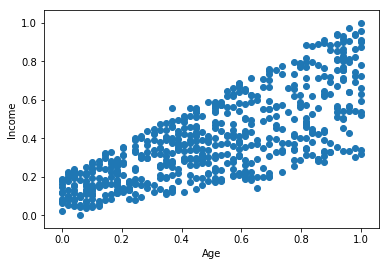

In [82]:
#Plot of age vs. income
plot_ = plt.scatter(data.age, data.income)
plot_x = plt.xlabel('Age')
plot_y = plt.ylabel('Income')

##### Conclusion: 
There is a noticeable correlation between age and income. From the correlation plot from problem 7 we can see that the correlation between age and income is 0.75. 

___

# Problem 9: 
Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

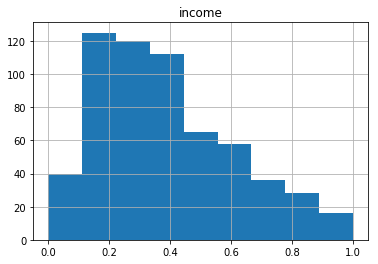

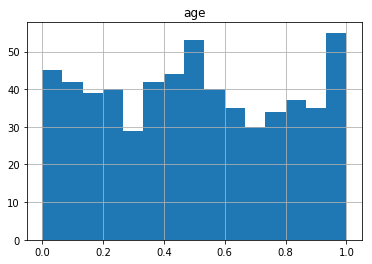

In [85]:
income_ = data.hist('income', bins = 9)
age_ = data.hist('age', bins = 15)

___

# Problem 10: 
Using a bar graph, plot the distribution of the values of the region attribute.

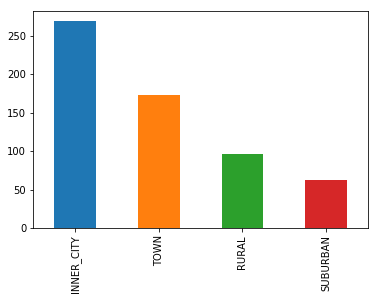

In [92]:
data.region.value_counts().plot(kind = 'bar')

___

# Problem 11: 
Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of
the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the
results as a 4 by 2 (region x pep) table with entries representing the counts. Hint: you can either use
Numpy or use aggregations functions in Pandas such as groupby() and cross-tab(). Then, either using
Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships
between these sets of variables. Hint: This example of creating simple bar charts using Matplotlib may be
useful.


In [98]:
grouped_df = data.groupby(['pep', 'region']).size().reset_index()
grouped_df.rename(columns = {0: 'count'})

,pep,region,count
0,NO,INNER_CITY,146
1,NO,RURAL,50
2,NO,SUBURBAN,28
3,NO,TOWN,102
4,YES,INNER_CITY,123
5,YES,RURAL,46
6,YES,SUBURBAN,34
7,YES,TOWN,71


___